# ***TESTING DRAW LEVELS TOOL***

The DrawLevels package creates drawn level schemes from input numbers. These values do not *need* to be drawn from some database, however for the intentions of drawing the levels we have available from the Isomer database.

Below are two demonstrations, first with drawings using arbitrary values (00--) and the other with data pulled from the .sqlite Isomer Database file.

#### ***Mock level diagram (not real values)***

In [1]:
# include relevant libraries 
import DrawLevels as DL
from IPython.display import Image
import pandas as pd
import sqlite3

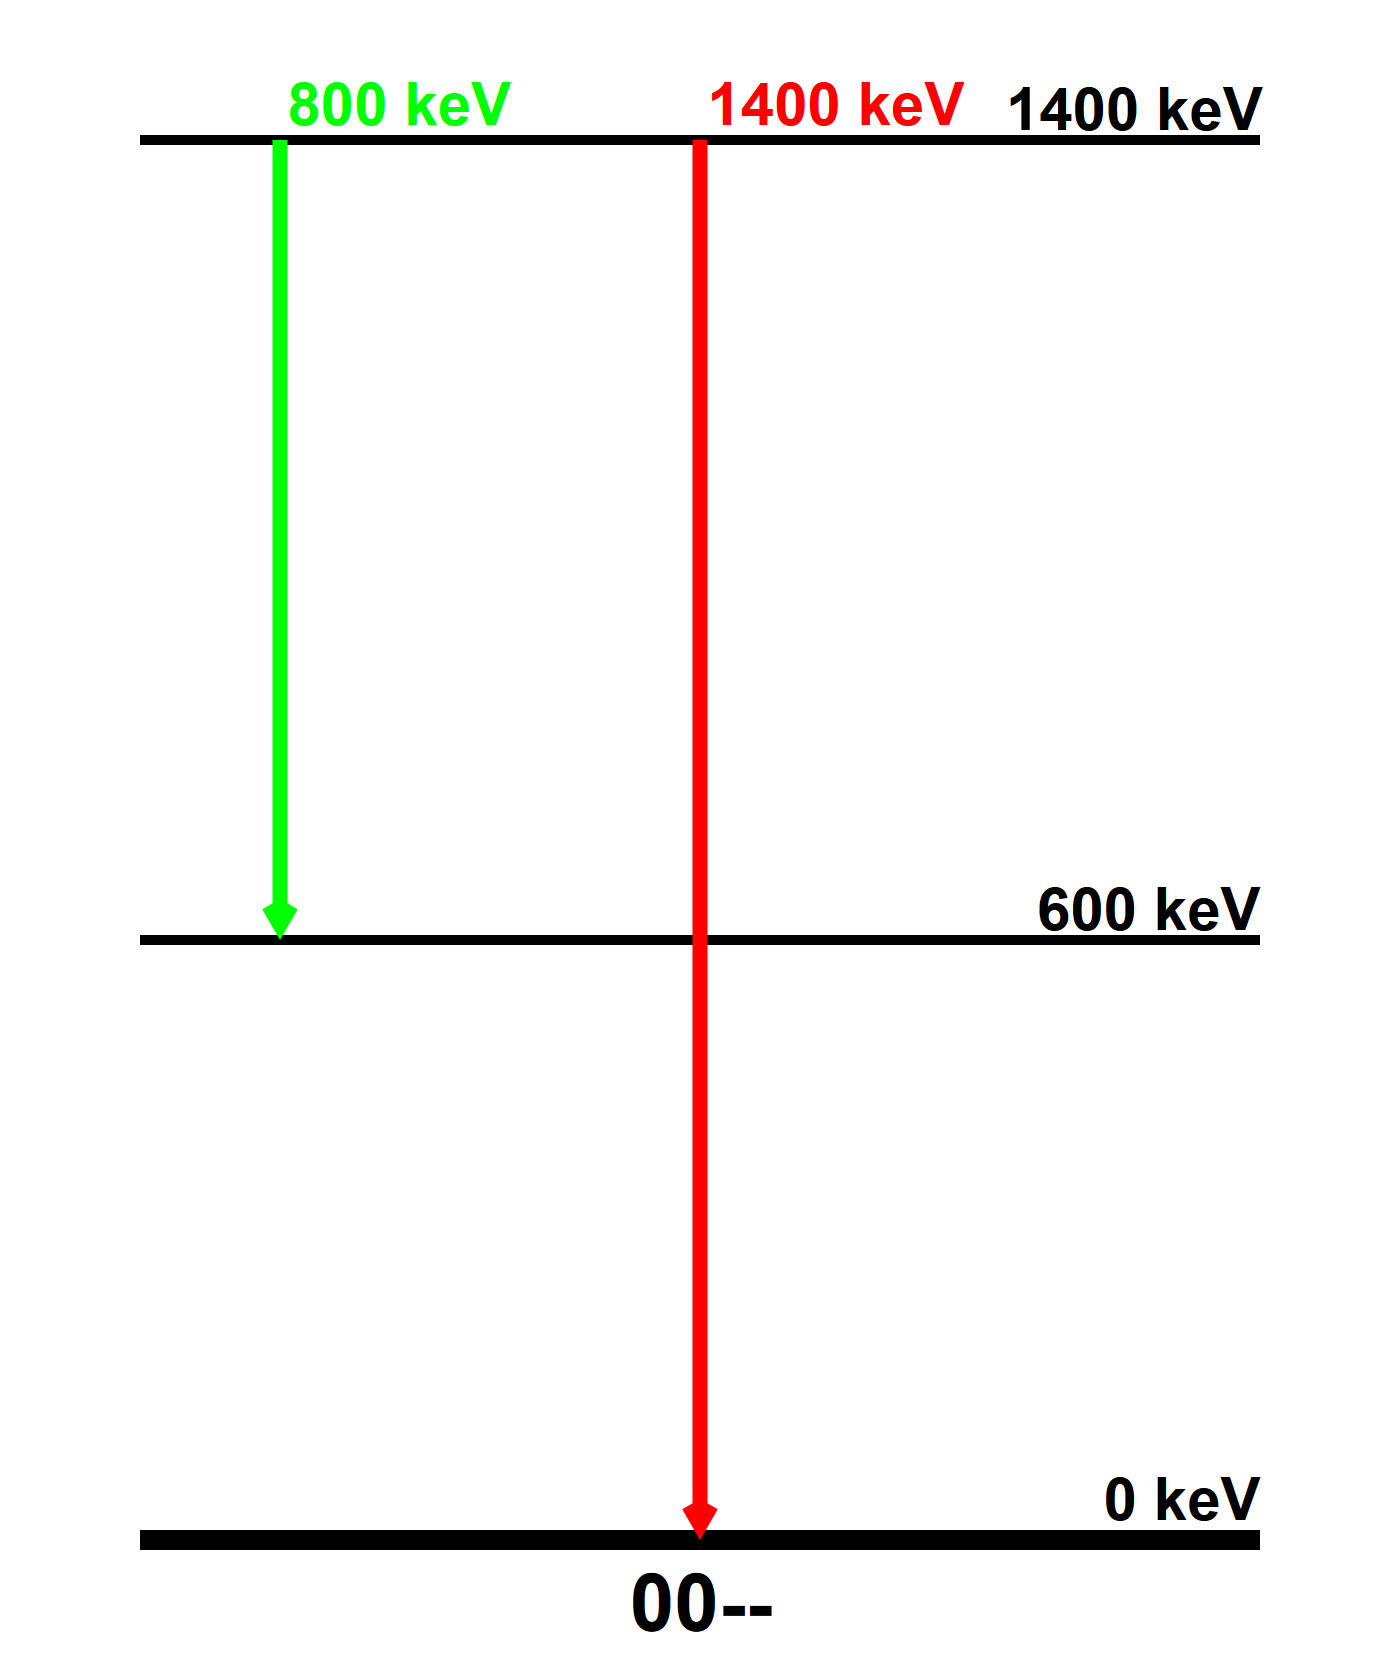

In [2]:
lvl_scheme_arb = DL.Scheme(1400, 1, "00--") # Assign a scheme object with (image_width, pixel_scale, title)
lvl_scheme_arb.SetFontSize(60)
lvl_scheme_arb.SetTitleFontSize(80)


L1 = DL.Level(1400, [0,0,0], 10) # Define level objects with (level, RGB, width)
lvl_scheme_arb.AddLevel(L1) # Add defined level to the scheme object

L2 = DL.Level(600, [0,0,0], 10)
lvl_scheme_arb.AddLevel(L2)

GL = DL.Level(0,[0,0,0],20) # Create Ground-level line
lvl_scheme_arb.AddLevel(GL) # Include ground level


T1 = DL.Transition(1400, 600, [0,240,0], 15, f"{1400-600} keV") # Define transition object with (start_energy, end_energy, RGB, width, title)
lvl_scheme_arb.AddTransition(T1)

T2 = DL.Transition(1400, 0, [240,0,0], 15, f"{1400} keV") # Define transition object with (start_energy, end_energy, RGB, width, title)
lvl_scheme_arb.AddTransition(T2)

lvl_scheme_arb.Draw("lvl_scheme_arb.png") # Create a file of the drawing using the .Draw method

# Clear the levels and transitions from the scheme -- important to clear as the DrawLevels library will remember previous entries.
lvl_scheme_arb.Levels.clear()
lvl_scheme_arb.Transitions.clear()


display(Image("lvl_scheme_arb.png", width=600, height=600)) # Display drawn level scheme in .ipynb


#### ***Full implementation of reading in CSV and drawing entries for 31Mg***

Now, we use a sqlite3 connection with Pandas' SQL-to-dataframe tools to transfer .sqlite information to readable entries for the DrawLevels package to interpret.

This example uses the selection query including all levels of 31Mg with half-lives between 0.001 and 100 micro-seconds within the Isomer database. These transitions and levels are then drawn with a similar pattern as seen in the arbitrary example.

In [ ]:
# Establish a connection with the .sqlite database for pandas to interact through
conn = sqlite3.connect("C:\\Users\\hudso\\OneDrive\\working\\IsomerProject\\NNDC_Code\\nndc_csvs\\Isomer_DB_TSTplaying.sqlite") # Establish a connection with the .sqlite database for pandas to interact through
# Read in the selection query to pull data to a Pandas DataFrame
data = pd.read_sql_query("SELECT * FROM Isomers WHERE A_IT IS 31 AND T12 BETWEEN 0.001 AND 100", conn, index_col=None)
data.head() # Display data header

,INDEX_IT,A_IT,Z_IT,E_GAMMA,D_EG,IT_RATIO,D_IT_RATIO,T12,D_T12,LEVEL,...,I_GAMMA,D_IG,M_GAMMA,M_RATIO,D_MRATIO,CONV,D_CONV,SOURCE,NAME,ROW
0,31120050.0,31,12,49.9,0.10,10,None,0.0120,3.00E-03,49.93,...,None,None,M1,None,None,None,None,Atlas2,DK,24
1,31120171.0,31,12,170.5,0.8,10,None,0.0160,3.00E-03,221.00,...,100,3,None,None,None,None,None,NNDC,OT,25
2,31120221.0,31,12,221.0,4,10,None,0.0160,3.00E-03,221.00,...,41,3,None,None,None,None,None,NNDC,OT,26
3,31120240.0,31,12,239.9,0.50,10,None,0.0105,8.00E-03,461.00,...,None,None,None,None,None,None,None,Atlas2,DK,27


49.93 49.9 0.030000000000001137 0.012
221.0 170.5 50.5 0.016
221.0 221.0 0.0 0.016
461.0 239.9 221.1 0.0105


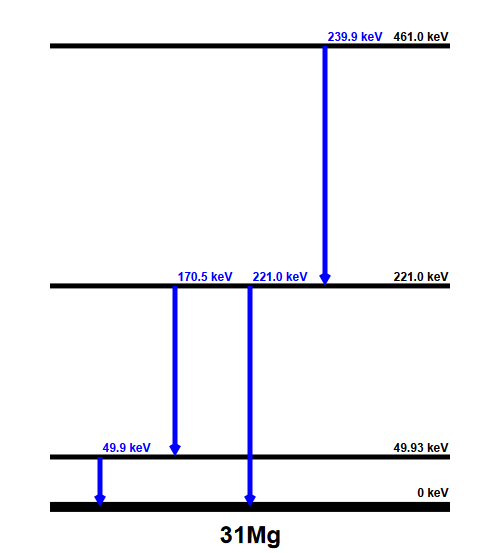

In [ ]:
lvl_scheme_31Mg = DL.Scheme(500, 1, "31Mg")
unique_levels = [] # Unique level drawing -- multiple transitions from same level
ground_lvl = DL.Level(0, [0,0,0], 10) # Ground level inclusion
lvl_scheme_31Mg.AddLevel(ground_lvl)

# Iterate for transitions present in filtered data for 31Mg
for i in range(len(data)):
    # Store relevant data entries
    level = data.loc[i, 'LEVEL']
    gamma = data.loc[i,'E_GAMMA']
    final_lvl = level - gamma

    print(level, gamma, final_lvl, data.loc[i, 'T12']) # Print for check
    # Unique level check
    if level not in unique_levels:
        unique_levels.append(level)
        schm_lvl = DL.Level(level, [0,0,0], 5)
        lvl_scheme_31Mg.AddLevel(schm_lvl)
    # Table of transitions appends values
    transition = DL.Transition(level, final_lvl, [0,0,40], 5, f"{gamma} keV")
    lvl_scheme_31Mg.AddTransition(transition)

# Draw and clear
lvl_scheme_31Mg.Draw("Lvl_31Mg_test.png")
lvl_scheme_31Mg.Levels.clear()
lvl_scheme_31Mg.Transitions.clear()
Image("Lvl_31Mg_test.png")